<a href="https://colab.research.google.com/github/RalfH1388/genai-lecture/blob/main/neuralnet_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# Dieser Code muss nicht verstanden werden, er stellt lediglich sicher, dass
# alle Ausgaben einer Zelle angezeigt werden (und nicht nur die letzte).
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
!pip install tensorflow

In [51]:
# Importieren der notwendigen Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [52]:
# Laden des Iris-Datensatzes
iris = load_iris()
X = iris.data  # Merkmale (4 Eingaben: Sepal- und Petal-Länge/Breite)
y = iris.target  # Zielwerte (Klassen: Setosa, Versicolor, Virginica)

X[:10]
y[:10]
y[-10:]

# Umwandeln der Zielwerte in One-Hot-Encoding
y = to_categorical(y)
y[:10]
y[-10:]
X.shape
y.shape

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

(150, 4)

(150, 3)

In [53]:
# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalieren der Merkmale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train[:10]
X_test[:10]

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282],
       [ 0.59831066, -1.25582892,  0.72969227,  0.95664273],
       [ 0.72020757,  0.30929911,  0.44316389,  0.4227026 ],
       [-0.74255534,  0.98006827, -1.27600637, -1.31260282],
       [-0.98634915,  1.20365799, -1.33331205, -1.31260282],
       [-0.74255534,  2.32160658, -1.27600637, -1.44608785]])

array([[ 0.35451684, -0.58505976,  0.55777524,  0.02224751],
       [-0.13307079,  1.65083742, -1.16139502, -1.17911778],
       [ 2.30486738, -1.0322392 ,  1.8185001 ,  1.49058286],
       [ 0.23261993, -0.36147005,  0.44316389,  0.4227026 ],
       [ 1.2077952 , -0.58505976,  0.61508092,  0.28921757],
       [-0.49876152,  0.75647855, -1.27600637, -1.04563275],
       [-0.2549677 , -0.36147005, -0.07258719,  0.15573254],
       [ 1.32969211,  0.08570939,  0.78699794,  1.49058286],
       [ 0.47641375, -1.92659808,  0.44316389,  0.4227026 ],
       [-0.01117388, -0.80864948,  0.09932984,  0.02224751]])

In [54]:
# Aufbau des neuronalen Netzes
model = Sequential([
    # Eingabeschicht (4 Merkmale)
    Dense(16, activation='relu', input_shape=(4,)),
    # Verdeckte Schicht
    Dense(8, activation='relu'),
    # Ausgabeschicht (3 Klassen)
    Dense(3, activation='softmax')
])

# Kompilieren des Modells
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training des Modells
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Vorhersagen für Testdaten
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [48]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
)

In [32]:
# Confusion Matrix erzeugen
konfusionsmatrix = confusion_matrix(true_classes, predicted_classes)
konfusionsmatrix

array([[10,  0,  0],
       [ 0,  6,  3],
       [ 0,  0, 11]])

Text(0.5, 1.0, 'Confusion Matrix')

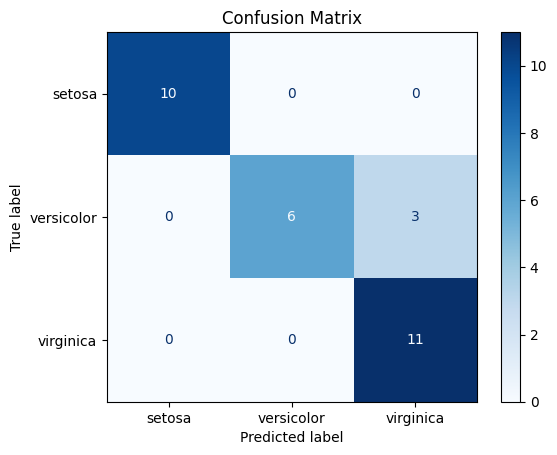

In [33]:
# Anzeige der Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=konfusionsmatrix,
                              display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [34]:
print("Echte Labels:        ", true_classes)
print("Vorhergesagte Labels:", predicted_classes)

Echte Labels:         [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Vorhergesagte Labels: [1 0 2 2 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [46]:
# Automatische Berechnung der Standardmetriken
print("Accuracy automatisch:", accuracy_score(true_classes, predicted_classes))
# Manuelle Berechnung der Metriken
true_prediction = konfusionsmatrix[0, 0] + konfusionsmatrix[1, 1] + konfusionsmatrix[2, 2]

accuracy = true_prediction / true_classes.shape[0]
print(f"Accuracy manuell:  {accuracy}")

Accuracy automatisch: 0.9


30

Accuracy manuell:  0.9
